# **Stock Market Prediction using Numerical and Textual Analysis**

## **TIME SERIES ANALYSIS**

### **TASK 7**

**Submitted By: Sneha Ganesh**

In [3]:
pip install yfinance

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date 
import yfinance as yf
# pip install yahoo-finance
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [75]:
# data=yf.download("^BSESN",end=date.today())
data=pd.read_csv("/content/drive/MyDrive/Stock Prediction using Text and Numerical Analysis/BSESN.csv", parse_dates=['Date'])
data=data.dropna()

In [76]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

The real time data has be taken from ‘Yahoo Finance’, the site provides historical data, and for this project, dataset of ‘SENSEX’ has been taken. The data is recorded on 1st of every month from 2010 till current date. As of now the dataset has 126 observation and 6 attributes.

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4794 entries, 0 to 4867
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4794 non-null   datetime64[ns]
 1   Open       4794 non-null   float64       
 2   High       4794 non-null   float64       
 3   Low        4794 non-null   float64       
 4   Close      4794 non-null   float64       
 5   Adj Close  4794 non-null   float64       
 6   Volume     4794 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 299.6 KB


In [78]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [79]:
data.shape

(4794, 7)

The profit or loss calculation is usually determined by the closing price of a stock; hence we will consider the closing price as the target variable.

### Movement of Data: Closing Stock


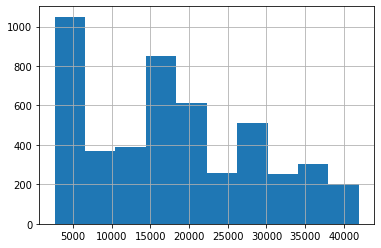

In [80]:
data['Close'].hist()

Text(0, 0.5, 'Close')

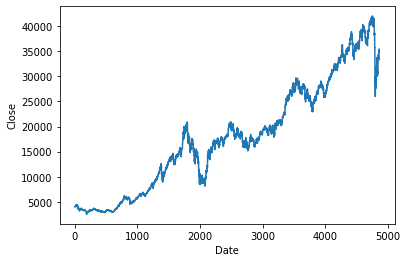

In [81]:
data['Close'].plot()
plt.xlabel("Date")
plt.ylabel("Close")

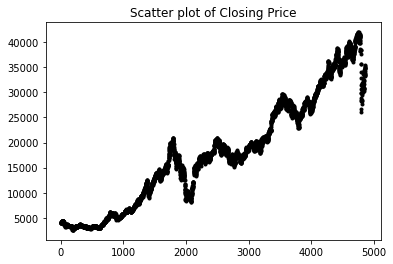

In [82]:
data['Close'].plot(style='k.')
plt.title("Scatter plot of Closing Price")
plt.show()

It shows an Upward trend so, the data is not stationary. Now we go with rolling mean and rolling standard deviation.

ADF (Augmented Dickey-Fuller) Test


The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

**Null Hypothesis**: The series has a unit root (value of a =1)

**Alternate Hypothesis**: The series has no unit root.

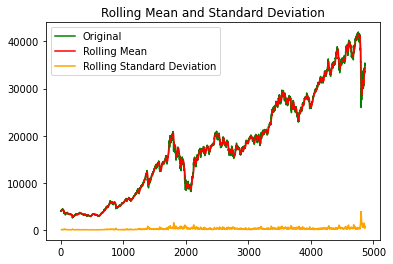

Results of dickey fuller test
Test Statistics                  -0.599040
p-value                           0.871199
No. of lags used                 28.000000
Number of observations used    4765.000000
critical value (1%)              -3.431723
critical value (5%)              -2.862147
critical value (10%)             -2.567093
dtype: float64


In [83]:
#Test for staionarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolling_mean = timeseries.rolling(12).mean()
    rolling_std = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='Green',label='Original')
    plt.plot(rolling_mean, color='Red', label='Rolling Mean')
    plt.plot(rolling_std, color='Orange', label = 'Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(data['Close'])

By looking at the above graph it can be seen that the mean and standard deviation are increasing and hence our data is not stationary. The p-value is greater than 0.05, and hence we cannot reject the null hypothesis, and the null hypothesis states that the series has unit root and hence is not stationary.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


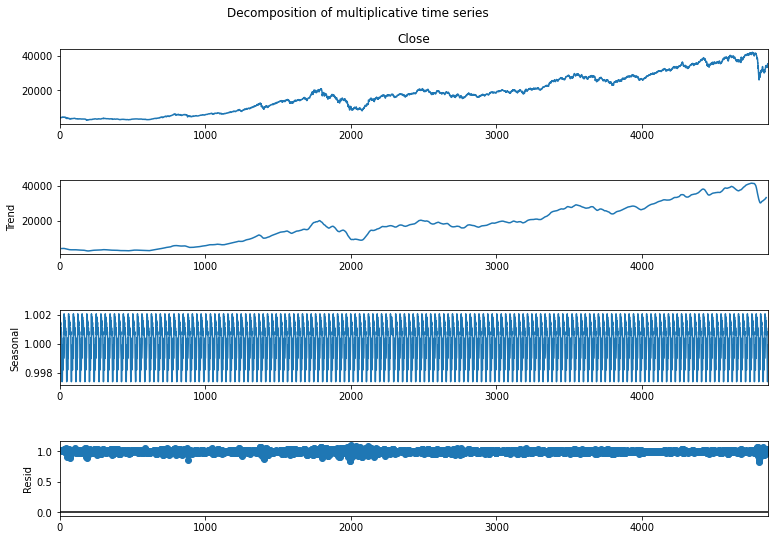

In [84]:
# Doing a quick vanilla decomposition to see any trend seasonality etc in the ts
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data.Close, model='multiplicative',freq=30)

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

No handles with labels found to put in legend.


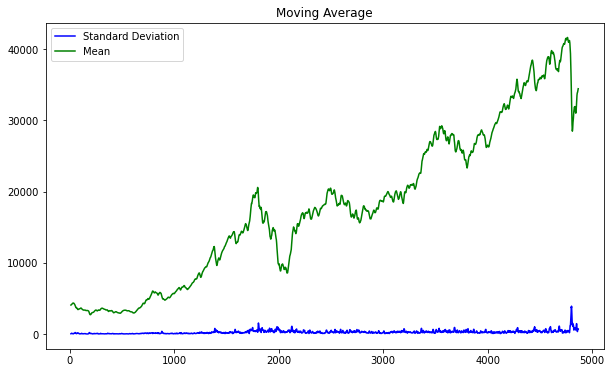

In [85]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(data.Close)
moving_avg = data.Close.rolling(12).mean()
std_dev = data.Close.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="Blue", label = "Standard Deviation")
plt.plot(moving_avg, color="Green", label = "Mean")
plt.legend()
plt.show()

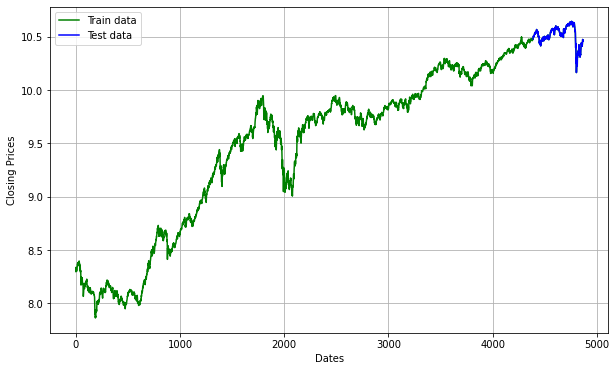

In [86]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [87]:
# pip uninstall statsmodels

In [88]:
# pip install numpy scipy patsy pandas

In [89]:
# pip install statsmodels

In [90]:
# pip install pmdarima

In [91]:
from pmdarima.arima import auto_arima

auto_arima_model = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-24397.010, Time=0.91 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-24424.066, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-24427.373, Time=4.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-24393.783, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-24431.397, Time=1.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-24435.447, Time=2.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-24436.523, Time=0.84 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-24435.322, Time=1.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-24433.315, Time=3.90 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-24433.556, Time=0.60 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 15.971 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4311
Model:               SARIMAX(2, 1, 0)   L

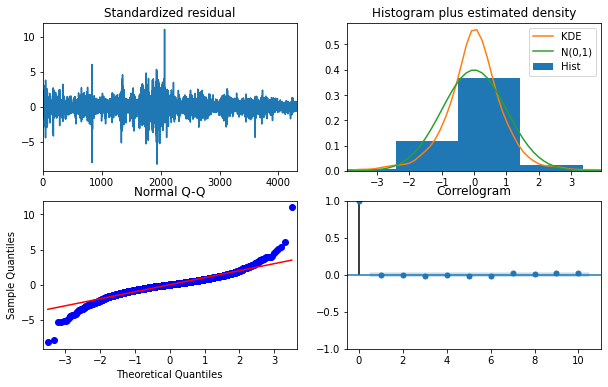

In [92]:
auto_arima_model.plot_diagnostics()
plt.show()

**Plot Interpretation**

**Standardized Residuals**: The plot shows the residual errors, the residuals seems to fluctuate around zero i.e. the mean and hence it seems that the variance is uniform.

**Histogram plus estimated density**: The plot is bell shapes and hence a normal distribution. So for a normal distribution the mean is zero.

**Q-Q Plot**: In the Q-Q plot the dots fall perfectly on the line and hence the distribution is non-skewed.

**Correlogram**: It is also called Auto Correlation Function, which shows serial correlation in the data that changes over time. On the y axis is the autocorrelation. The x axis tells you the lag. So, if x=1 we have a lag of 1. If x=2, we have a lag of 2.


The auto_arima model suggets that the best fit model is `ARIMA(2,1,0)` and the fit time is `13.985` seconds.

In [93]:
from statsmodels.tsa.arima_model import ARIMA
model_arima=ARIMA(train_data,order=(2,1,0))
fit_model=model_arima.fit()
print(fit_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4310
Model:                 ARIMA(2, 1, 0)   Log Likelihood               12222.262
Method:                       css-mle   S.D. of innovations              0.014
Date:                Thu, 19 Nov 2020   AIC                         -24436.523
Time:                        20:39:06   BIC                         -24411.049
Sample:                             1   HQIC                        -24427.527
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.000      2.232      0.026    6.05e-05       0.001
ar.L1.D.Close     0.0867      0.015      5.703      0.000       0.057       0.117
ar.L2.D.Close    -0.0579      0.015     

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [94]:
fc, se, conf = fit_model.forecast(480, alpha=0.05) 
fc_series = pd.Series(fc, index=test_data.index)
low = pd.Series(conf[:, 0], index=test_data.index)
up = pd.Series(conf[:, 1], index=test_data.index)

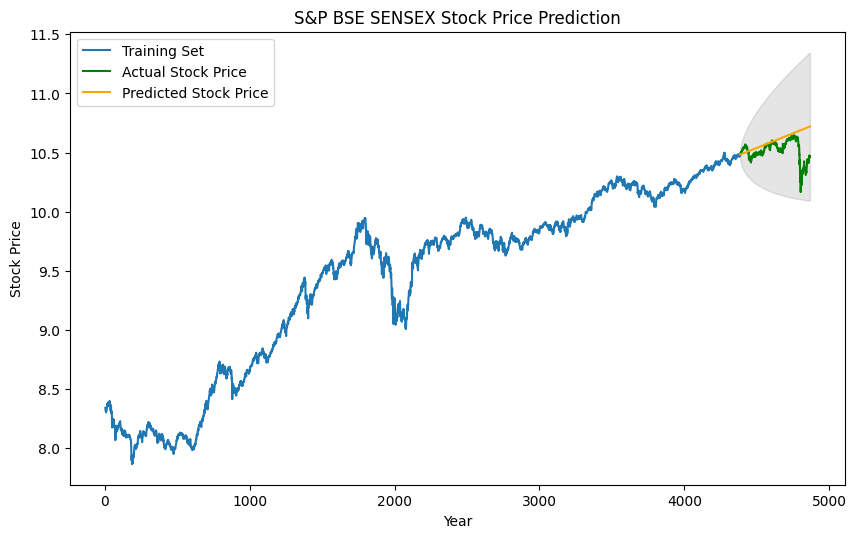

In [95]:
plt.figure(figsize=(10,6), dpi=100)
plt.plot(train_data, label='Training Set')
plt.plot(test_data, color = 'green', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(low.index, low, up, color='k', alpha=.10)
plt.title('S&P BSE SENSEX Stock Price Prediction')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend(fontsize=10,loc='upper left')
plt.show()

# **Performance Metrics**

In [96]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [97]:
# Mean Squared Error
mse = metrics.mean_squared_error(test_data, fc)
print('Mean Squared Error:',mse)

Mean Squared Error: 0.020570659856981807


In [98]:
# RMSE is the standard deviation of the errors it is same as MSE but the root of the value is considered
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(test_data, fc)))

Root Mean Squared Error:  0.14342475329238608


## **Text Analysis**

In [30]:
import pandas as pd
import numpy as np 

In [31]:
df=pd.read_csv("/content/drive/MyDrive/Stock Prediction using Text and Numerical Analysis/india-news-headlines.csv", parse_dates=['publish_date'])
df.dropna(inplace=True)

In [32]:
df.head()

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa


The dataset has 3 columns date, category and news. The `publish_date` column is parsed into date format. The `headine_category` column is not important and won't contribute for the model building and hence the column will be dropped in the later step.

In [33]:
df.shape

(3297172, 3)

In [34]:
df.drop(0,inplace=True)
df.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [35]:
df.drop(['headline_category'], axis=1, inplace=True)
df['headline_category'] = df.groupby(['publish_date']).transform(lambda x : ' '.join(x)) 
df = df.drop_duplicates() 

In [36]:
df.reset_index(inplace = True, drop = True)
data.reset_index(inplace=True,drop=True)

In [42]:
df.shape

(3154915, 3)

In [43]:
df.head()

,publish_date,headline_text,headline_category
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,America's unwanted heading for India?,Status quo will not be disturbed at Ayodhya; s...
3,2001-01-02,For bigwigs; it is destination Goa,Status quo will not be disturbed at Ayodhya; s...
4,2001-01-02,Extra buses to clear tourist traffic,Status quo will not be disturbed at Ayodhya; s...


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154915 entries, 0 to 3154914
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_text      object        
 2   headline_category  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 72.2+ MB


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Remove URL from the text


In [46]:
import re
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
df['headline_text']=df['headline_text'].apply(lambda x : remove_URL(x))

Remove Emojis


In [47]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
df['headline_text']=df['headline_text'].apply(lambda x : remove_html(x))

Function for removing punctuations


In [48]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['headline_text']=df['headline_text'].apply(lambda x: remove_punctuation(x))

### Plot WordCloud

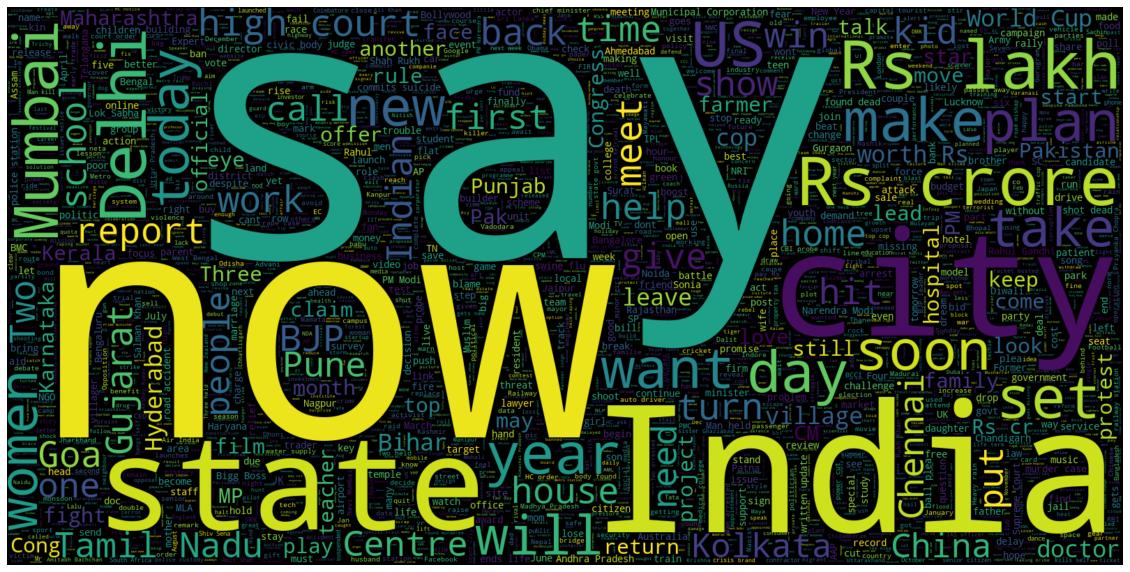

In [49]:
def plot_wordcloud(text):
    wordcloud = WordCloud(background_color = 'black',
                         max_words = 3000,
                         width=1600,
                         height=800).generate(text)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
plt.figure(figsize=(20,18))
plot_wordcloud(' '.join(df['headline_text']))

Lemmatization

In [50]:
def basic_clean(text):
        wnl = nltk.stem.WordNetLemmatizer()
        stopwords = nltk.corpus.stopwords.words('english')
        words = re.sub(r'[^\w\s]', '', text).split()
        return [wnl.lemmatize(word) for word in words if word not in stopwords]
"""
A simple function to clean up the data. All the words that
are not designated as a stop word is then lemmatized after
encoding and basic regex parsing are performed.
"""

'\nA simple function to clean up the data. All the words that\nare not designated as a stop word is then lemmatized after\nencoding and basic regex parsing are performed.\n'

In [51]:
words = basic_clean(''.join(str(df['headline_text'].tolist())))

In [52]:
words[:10]

['Status',
 'quo',
 'disturbed',
 'Ayodhya',
 'say',
 'Vajpayee',
 'Fissures',
 'Hurriyat',
 'Pak',
 'visit']

# N-Gram Analysis
In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles

## N-gram Analysis - Unigram, Bigram and Trigram

## Unigram Analysis

In [53]:
words_unigram_series = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

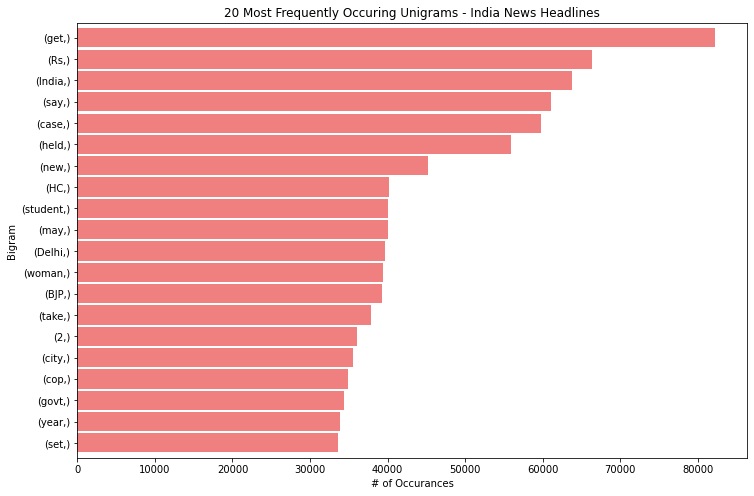

In [54]:
words_unigram_series.sort_values().plot.barh(color='lightcoral', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Unigrams - India News Headlines')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

### Bigram Analysis

In [55]:
words_bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

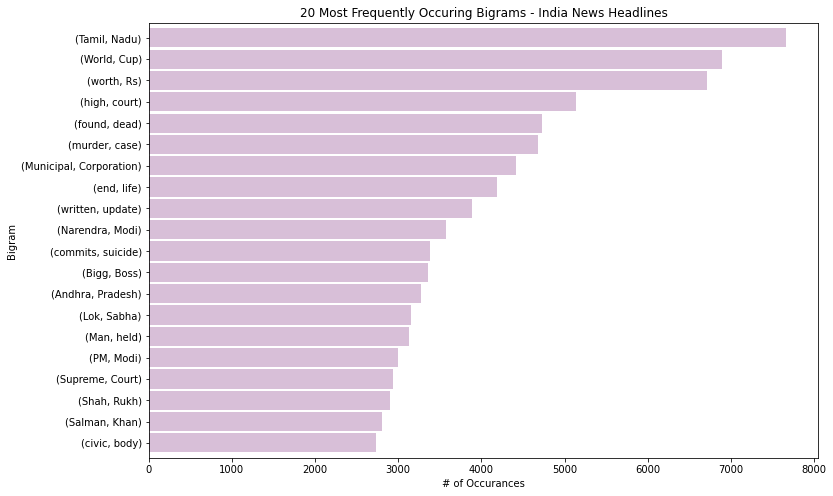

In [56]:
words_bigrams_series.sort_values().plot.barh(color='thistle', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams - India News Headlines')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

### Trigram Analysis

Text(0.5, 0, '# of Occurances')

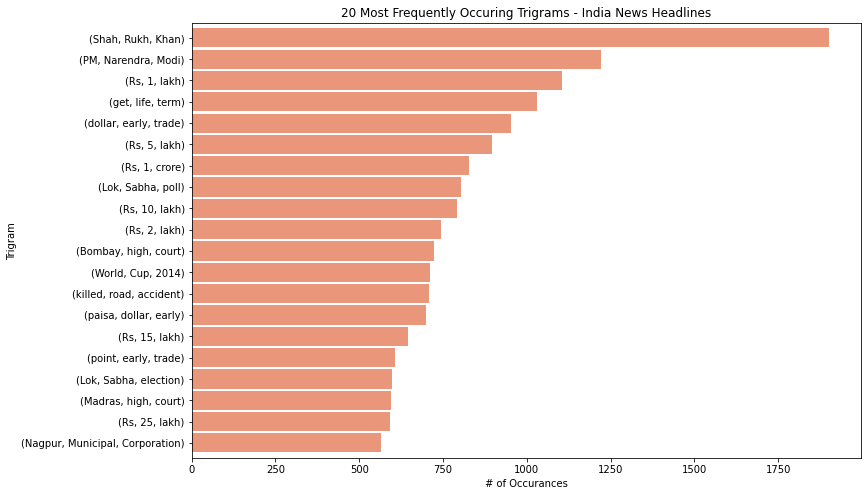

In [57]:
words_trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]
words_trigrams_series.sort_values().plot.barh(color='darksalmon', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams - India News Headlines')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

# Sentiment Analysis

Sentiment analysis is basically the process of determining the attitude or the emotion of the text, whether it is positive or negative or neutral.

The sentiment function of textblob returns two properties, polarity, and subjectivity.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [58]:
from textblob import TextBlob

# Function for Polarity and Subjectivity 

def pol(text):
  return TextBlob(text).sentiment.polarity

def sub(text):
  return TextBlob(text).sentiment.subjectivity

In [59]:
df['Polarity']=df['headline_text'].apply(pol)

In [60]:
df['Subjectivity']=df['headline_text'].apply(sub)

In [61]:
pip install vaderSentiment


     |████████████████████████████████| 133kB 3.5MB/s 


In [62]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
sid_obj = SentimentIntensityAnalyzer() 
df['Positive'] = [sid_obj.polarity_scores(x)['pos'] for x in df['headline_text']]
df['Neutral'] = [sid_obj.polarity_scores(x)['neu'] for x in df['headline_text']]
df['Negative'] = [sid_obj.polarity_scores(x)['neg'] for x in df['headline_text']]
df['Compound'] = [sid_obj.polarity_scores(x)['compound'] for x in df['headline_text']]

In [63]:
df.head()

,publish_date,headline_text,headline_category,Polarity,Subjectivity,Positive,Neutral,Negative,Compound
0,2001-01-02,Status quo will not be disturbed at Ayodhya sa...,Status quo will not be disturbed at Ayodhya; s...,0.00,0.000000,0.195,0.805,0.000,0.2924
1,2001-01-02,Fissures in Hurriyat over Pak visit,Status quo will not be disturbed at Ayodhya; s...,0.00,0.000000,0.000,1.000,0.000,0.0000
2,2001-01-02,Americas unwanted heading for India,Status quo will not be disturbed at Ayodhya; s...,0.00,0.000000,0.000,0.678,0.322,-0.2263
3,2001-01-02,For bigwigs it is destination Goa,Status quo will not be disturbed at Ayodhya; s...,0.00,0.000000,0.000,1.000,0.000,0.0000
4,2001-01-02,Extra buses to clear tourist traffic,Status quo will not be disturbed at Ayodhya; s...,0.05,0.241667,0.342,0.658,0.000,0.3818


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

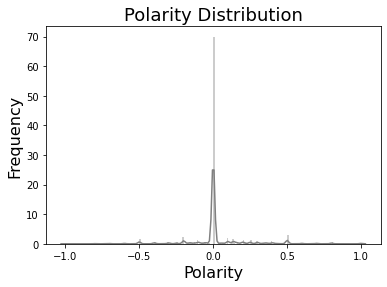

In [64]:
# To check the distribution of polarity and subjectivity
import seaborn as sns
sns.distplot(df['Polarity'],kde=True, color='gray',bins=200)
plt.title('Polarity Distribution', fontsize=18)
plt.xlabel('Polarity', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

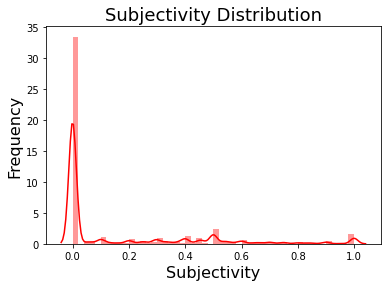

In [65]:
sns.distplot(df['Subjectivity'],kde=True, color='red')
plt.title('Subjectivity Distribution', fontsize=18)
plt.xlabel('Subjectivity', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [72]:
df.rename(columns={'publish_date':'Date'},inplace=True)

In [73]:
df.sample(1)

,Date,headline_text,headline_category,Polarity,Subjectivity,Positive,Neutral,Negative,Compound
2629977,2017-11-21,Police posted outside Deepika Padukones parent...,We will win polls even if I'm in jail; says La...,0.0,0.05,0.0,1.0,0.0,0.0


### Merge the two dataset

In [107]:
df_merge = pd.merge(data,df , how='inner', on='Date')

In [108]:
df_merge.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,headline_category,Polarity,Subjectivity,Positive,Neutral,Negative,Compound
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,Status quo will not be disturbed at Ayodhya sa...,Status quo will not be disturbed at Ayodhya; s...,0.00,0.000000,0.195,0.805,0.000,0.2924
1,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,Fissures in Hurriyat over Pak visit,Status quo will not be disturbed at Ayodhya; s...,0.00,0.000000,0.000,1.000,0.000,0.0000
2,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,Americas unwanted heading for India,Status quo will not be disturbed at Ayodhya; s...,0.00,0.000000,0.000,0.678,0.322,-0.2263
3,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,For bigwigs it is destination Goa,Status quo will not be disturbed at Ayodhya; s...,0.00,0.000000,0.000,1.000,0.000,0.0000
4,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,Extra buses to clear tourist traffic,Status quo will not be disturbed at Ayodhya; s...,0.05,0.241667,0.342,0.658,0.000,0.3818


In [109]:
df_new=df_merge
df_new.drop(['Date','Open', 'High', 'Low', 'Adj Close', 'Volume', 'headline_text', 'headline_category'],inplace=True,axis=1)

In [110]:
df_new.shape

(2148004, 7)

## Normalization of the Data 

Normalization makes training less sensitive to the scale of features, so we can better solve for coefficients.

The use of a normalization method will improve analysis from multiple models.

In [116]:
X = df_new.drop('Close', axis=1)
y = df_new['Close']

In [117]:
from sklearn.model_selection import train_test_split
seed=10
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state = seed)

In [118]:
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)

(1611003, 6) (537001, 6) (1611003,) (537001,)


In [119]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_validation_std=sc.transform(X_valid)

## **DECISION TREE**

In [120]:
from sklearn.tree import DecisionTreeRegressor
regr_DT = DecisionTreeRegressor(random_state=0,max_depth=7)
regr_DT.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [121]:
y_pred = regr_DT.predict(X_valid)

In [122]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: {0} ------- Depth: {1}".format(mean_absolute_error(y_valid,y_pred),regr_DT.get_depth()))

Mean Absolute Error: 7786.31429475799 ------- Depth: 7


In [123]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_valid,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_valid,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_valid,y_pred)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_valid,y_pred))


Mean Absolute Error:  7786.31429475799
Mean Squared Error:  91807718.76300888
Root Mean Squared Error:  9581.634451543687
Explained Variance Score:  0.06300093632686432


In [124]:
lst_MAE = []
lst_depths = []
for depths in range(1, 20):
    regr_DT = DecisionTreeRegressor(random_state=10, max_depth=depths)
    regr_DT.fit(X_train, y_train)
    preds = regr_DT.predict(X_valid)
    current_MAE = mean_absolute_error(y_valid, preds)
    lst_MAE.append(current_MAE)
    lst_depths.append(depths)

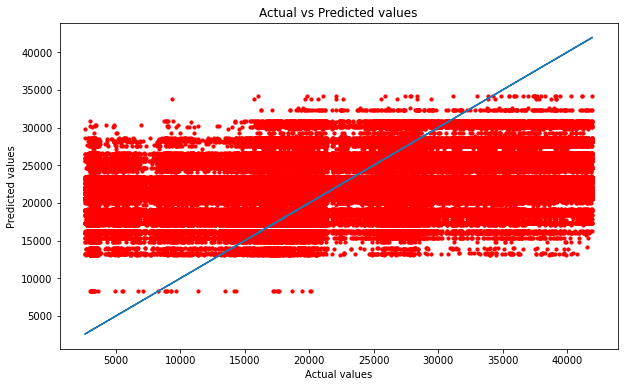

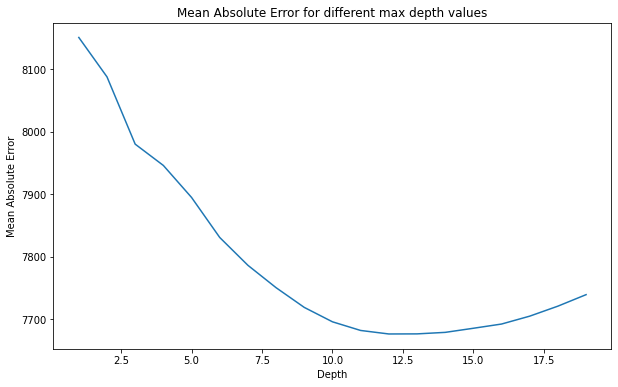

In [125]:
import matplotlib
matplotlib.pyplot.figure(1)
matplotlib.pyplot.plot(y_valid, y_valid)
matplotlib.pyplot.scatter(y_valid, y_pred, s=10, c="red")
matplotlib.pyplot.title("Actual vs Predicted values")
matplotlib.pyplot.xlabel("Actual values")
matplotlib.pyplot.ylabel("Predicted values")

matplotlib.pyplot.figure(2)
matplotlib.pyplot.plot(lst_depths, lst_MAE)
matplotlib.pyplot.title("Mean Absolute Error for different max depth values")
matplotlib.pyplot.xlabel("Depth")
matplotlib.pyplot.ylabel("Mean Absolute Error")

matplotlib.pyplot.show()

## **Random Forest**

In [129]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=76,n_jobs=4)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=76,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [130]:
predictions1=rf.predict(X_valid)

In [131]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_valid,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_valid,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_valid,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_valid,predictions1))


Mean Absolute Error:  7819.629813424399
Mean Squared Error:  92229585.20455137
Root Mean Squared Error:  9603.623545545262
Explained Variance Score:  0.05869271817049804


In [132]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_valid, y_valid)
rf.score(X_valid, y_valid)
print("Accuracy of random forest model",rf.score(X_valid, y_valid))

Accuracy of random forest model 0.20635194399651158


## XGBOOST

In [ ]:
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
y_valid = XGB.predict(X_valid)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train,y_train)
predictions = my_model.predict(X_valid)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_valid,predictions)))

In [ ]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_valid,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_valid,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_valid,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_valid,predictions))

In [ ]:
print('r2 score is:')
r2 = r2_score(y_valid,predictions)
r2*100

In [ ]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_valid).flatten(), 'Predicted Values': predictions.flatten()})
error_diff1 = error_diff.head(20)

In [ ]:
error_diff1.head()

In [ ]:
import plotly.graph_objs as go
title='Pred vs Actual'
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff1['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff1['Actual Values'])
])
fig.update_layout(barmode='group')
fig.show()